<a href="https://colab.research.google.com/github/fabehashahzad/CNN-model-on-cifar-10/blob/main/alexanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train class distribution: [120. 120. 120. 120. 120. 120. 120. 120. 120. 120.]
Valid class distribution: [30. 30. 30. 30. 30. 30. 30. 30. 30. 30.]
Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 4, 4, 96)          0         
 ng2D)                                                           
                                                                 
 batch_normalization_63 (Ba  (None, 4, 4, 96)          384       
 tchNormalization)                                               
                                                                 
 conv2d_46 (Conv2D)          (None, 4, 4, 256

Epoch 1/30


<ipython-input-11-1191a920b6ee>:139: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_lr_001 = model.fit_generator(datagen.flow(x_mini_train, y_mini_train, batch_size=batch_size),


19/19 [==============================] - 18s 852ms/step - loss: 2.8840 - accuracy: 0.1625 - val_loss: 14.0785 - val_accuracy: 0.1000 - lr: 0.0100
Epoch 2/30
19/19 [==============================] - 18s 933ms/step - loss: 2.5750 - accuracy: 0.2150 - val_loss: 19.3863 - val_accuracy: 0.1233 - lr: 0.0100
Epoch 3/30
19/19 [==============================] - 17s 853ms/step - loss: 2.4057 - accuracy: 0.2300 - val_loss: 5.7337 - val_accuracy: 0.1567 - lr: 0.0100
Epoch 4/30
19/19 [==============================] - 16s 853ms/step - loss: 2.2525 - accuracy: 0.2708 - val_loss: 5.6571 - val_accuracy: 0.1333 - lr: 0.0100
Epoch 5/30
19/19 [==============================] - 16s 841ms/step - loss: 2.1474 - accuracy: 0.3042 - val_loss: 4.2176 - val_accuracy: 0.1767 - lr: 0.0100
Epoch 6/30
19/19 [==============================] - 16s 855ms/step - loss: 2.0005 - accuracy: 0.3242 - val_loss: 3.3658 - val_accuracy: 0.1933 - lr: 0.0100
Epoch 7/30
19/19 [==============================] - 16s 859ms/step - loss

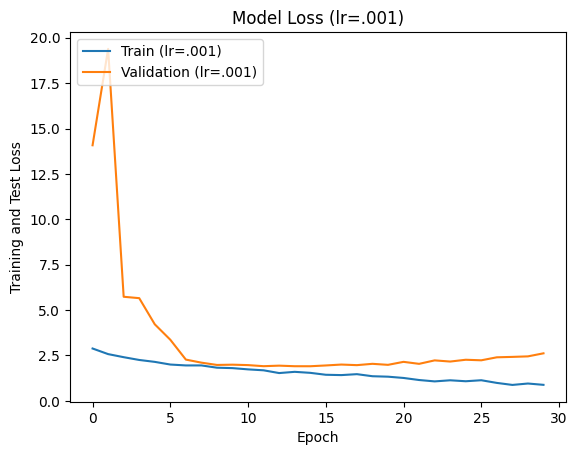

Epoch 1/30


<ipython-input-11-1191a920b6ee>:159: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_lr_01 = model.fit_generator(datagen.flow(x_mini_train, y_mini_train, batch_size=batch_size),


19/19 [==============================] - 20s 965ms/step - loss: 0.8411 - accuracy: 0.7033 - val_loss: 2.5432 - val_accuracy: 0.3833 - lr: 0.0100
Epoch 2/30
19/19 [==============================] - 17s 882ms/step - loss: 0.7623 - accuracy: 0.7275 - val_loss: 2.6189 - val_accuracy: 0.3833 - lr: 0.0100
Epoch 3/30
19/19 [==============================] - 17s 913ms/step - loss: 0.7958 - accuracy: 0.7267 - val_loss: 2.5689 - val_accuracy: 0.4000 - lr: 0.0100
Epoch 4/30
19/19 [==============================] - 17s 894ms/step - loss: 0.7461 - accuracy: 0.7408 - val_loss: 2.5946 - val_accuracy: 0.3867 - lr: 0.0100
Epoch 5/30
19/19 [==============================] - 16s 856ms/step - loss: 0.7367 - accuracy: 0.7350 - val_loss: 2.8205 - val_accuracy: 0.3800 - lr: 0.0100
Epoch 6/30
19/19 [==============================] - 16s 865ms/step - loss: 0.7053 - accuracy: 0.7675 - val_loss: 2.8590 - val_accuracy: 0.3967 - lr: 0.0100
Epoch 7/30
19/19 [==============================] - 16s 857ms/step - loss: 

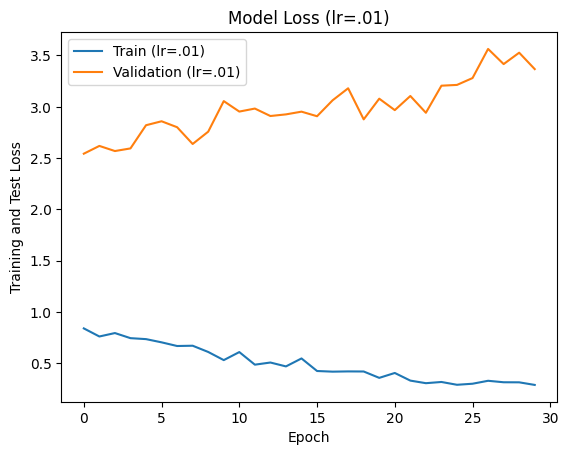

Loading the final test accuracies...
313/313 - 12s - loss: 3.3629 - accuracy: 0.4411 - 12s/epoch - 39ms/step
313/313 - 12s - loss: 3.3629 - accuracy: 0.4411 - 12s/epoch - 39ms/step
Final Test Accuracy (lr=.001): 0.44110000133514404
Final Test Accuracy (lr=.01): 0.44110000133514404


In [11]:
import os
import keras
from keras.datasets import cifar10
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model
from keras.layers import Dropout, Flatten
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

num_classes = 10
batch_size = 64
epochs = 30
iterations = 780
DROPOUT = 0.5
CONCAT_AXIS = 3
DATA_FORMAT = 'channels_last'
log_filepath = 'C:\\Users\\Esrat Maria\\Desktop\\AlexNet'

def color_preprocessing(*datasets):
    processed_datasets = []
    for dataset in datasets:
        dataset = dataset.astype('float32')
        mean = [125.307, 122.95, 113.865]
        std = [62.9932, 62.0887, 66.7048]
        for i in range(3):
            dataset[:, :, :, i] = (dataset[:, :, :, i] - mean[i]) / std[i]
        processed_datasets.append(dataset)
    return processed_datasets

# defining learning rate based on the number of epochs
def scheduler(epoch):
    if epoch < 100:
        return 0.01
    if epoch < 200:
        return 0.001
    return 0.0001

# loading cifar10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train, x_test = color_preprocessing(x_train, x_test)

# Choose first 150 images in each class
num_images_per_class = 150
selected_indices = []

for class_label in range(num_classes):
    class_indices = np.where(y_train[:, class_label] == 1)[0][:num_images_per_class]
    selected_indices.extend(class_indices)

# Select the corresponding images and labels
x_mini_train = x_train[selected_indices]
y_mini_train = y_train[selected_indices]

# Split the MINI CIFAR-10 dataset into train (60%), valid (20%), and test (20%) sets with equal class distribution
x_mini_train, x_mini_valid, y_mini_train, y_mini_valid = train_test_split(
    x_mini_train, y_mini_train, test_size=0.2, random_state=42, stratify=y_mini_train
)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
# Check the class distribution in the sets
print("Train class distribution:", np.sum(y_mini_train, axis=0))
print("Valid class distribution:", np.sum(y_mini_valid, axis=0))

# Continue with the rest of your code (AlexNet architecture and training) using x_mini_train, y_mini_train, x_mini_valid, y_mini_valid, x_test, y_test.
def alexnet(img_input, classes=10):

  # 1st conv layer
  x = Conv2D(96, (11, 11), strides=(4, 4), padding='same',
             activation='relu', kernel_initializer='uniform')(img_input)  # valid
  x = MaxPooling2D(pool_size=(3, 3), strides=(
      2, 2), padding='same', data_format=DATA_FORMAT)(x)
  x = BatchNormalization()(x)

  # 2nd conv layer
  x = Conv2D(256, (5, 5), strides=(1, 1), padding='same',
             activation='relu', kernel_initializer='uniform')(x)
  x = MaxPooling2D(pool_size=(3, 3), strides=(
      2, 2), padding='same', data_format=DATA_FORMAT)(x)
  x = BatchNormalization()(x)

  # 3rd conv layer
  x = Conv2D(384, (3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)

  # 4th conv layer
  x = Conv2D(384, (3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_initializer='uniform')(x)
  x = BatchNormalization()(x)

  # 5th conv layer
  x = Conv2D(256, (3, 3), strides=(1, 1), padding='same',
             activation='relu', kernel_initializer='uniform')(x)
  x = MaxPooling2D(pool_size=(3, 3), strides=(
      2, 2), padding='same', data_format=DATA_FORMAT)(x)
  x = BatchNormalization()(x)

  # flattening before sending to fully connected layers
  x = Flatten()(x)
  # fully connected layers
  x = Dense(4096, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = BatchNormalization()(x)
  x = Dense(1000, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = BatchNormalization()(x)

  # output layer
  out = Dense(classes, activation='softmax')(x)
  return out
# Building CNN (AlexNet) for MINI CIFAR-10
img_input = Input(shape=(32, 32, 3))
output = alexnet(img_input)
model = Model(img_input, output)
model.summary()

# First Learning Rate (lr=.001)
sgd_lr_001 = optimizers.SGD(lr=.001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd_lr_001, metrics=['accuracy'])
tb_cb_lr_001 = TensorBoard(log_dir=log_filepath + '_lr_001', histogram_freq=0)
change_lr_lr_001 = LearningRateScheduler(scheduler)
cbks_lr_001 = [change_lr_lr_001, tb_cb_lr_001]

datagen.fit(x_mini_train)

# First Learning Rate (lr=.001)
# First Learning Rate (lr=.001)
history_lr_001 = model.fit_generator(datagen.flow(x_mini_train, y_mini_train, batch_size=batch_size),
                                     epochs=epochs,
                                     callbacks=cbks_lr_001,
                                     validation_data=(x_mini_valid, y_mini_valid))

# plotting loss VS epoch for lr=.001
plt.plot(history_lr_001.history['loss'], label='Loss (lr=.001)')
plt.plot(history_lr_001.history['val_loss'], label='val_loss (lr=.001)')
plt.title('Model Loss (lr=.001)')
plt.ylabel('Training and Test Loss')
plt.xlabel('Epoch')
plt.legend(['Train (lr=.001)', 'Validation (lr=.001)'], loc='upper left')
plt.show()
sgd_lr_01 = optimizers.SGD(lr=.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd_lr_01, metrics=['accuracy'])
tb_cb_lr_01 = TensorBoard(log_dir=log_filepath + '_lr_01', histogram_freq=0)
change_lr_lr_01 = LearningRateScheduler(scheduler)
cbks_lr_01 = [change_lr_lr_01, tb_cb_lr_01]
# Second Learning Rate (lr=.01)
history_lr_01 = model.fit_generator(datagen.flow(x_mini_train, y_mini_train, batch_size=batch_size),
                                    epochs=epochs,
                                    callbacks=cbks_lr_01,
                                    validation_data=(x_mini_valid, y_mini_valid))

# plotting loss VS epoch for lr=.01
plt.plot(history_lr_01.history['loss'], label='Loss (lr=.01)')
plt.plot(history_lr_01.history['val_loss'], label='val_loss (lr=.01)')
plt.title('Model Loss (lr=.01)')
plt.ylabel('Training and Test Loss')
plt.xlabel('Epoch')
plt.legend(['Train (lr=.01)', 'Validation (lr=.01)'], loc='upper left')
plt.show()


# Display final test accuracies
print('Loading the final test accuracies...')
test_loss_lr_001, test_acc_lr_001 = model.evaluate(x_test, y_test, verbose=2)
test_loss_lr_01, test_acc_lr_01 = model.evaluate(x_test, y_test, verbose=2)

# Final accuracies
print('Final Test Accuracy (lr=.001):', test_acc_lr_001)
print('Final Test Accuracy (lr=.01):', test_acc_lr_01)